# Générer du texte avec des RNN

In [ ]:
!git clone https://github.com/donaldong/rnn-text-gen.git

Cloning into 'rnn-text-gen'...
remote: Enumerating objects: 331, done.
remote: Total 331 (delta 0), reused 0 (delta 0), pack-reused 331
Receiving objects: 100% (331/331), 318.05 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [ ]:
import sys
sys.path.insert(0,'/content/rnn-text-gen')

In [ ]:
# On importe les classes issues du module custom que nous avons cloné
from src.text_generator import RNNTextGenerator
from src.dataset import Dataset

# On importe les librairies classiques nécessaires pour la suite
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
f = open('/content/rnn-text-gen/data/UN_news100.txt')
text = f.read()
print(text[:1000])

Kyoto Treaty becomes legally binding on February 16
''November 18 2004, Nairobi.'' The [[w:United Nations|United Nations]] has announced that the [[w:Kyoto Treaty|Kyoto Treaty]], which its signatories claim will counter the [[w:greenhouse effect|greenhouse effect]] and global climate changes, will take effect on February 16, 2005. 

The treaty could not be made legally binding to those countries who signed it earlier, the BBC reports, because they did not make up for the required 55% of the world's emission of greenhouse gases. Last month, [[w:Russia|Russia]] announced they would sign the treaty, pushing that percentage to 55%. Andrei Denisov, Russia's ambassador to the United Nations, handed [[w:Kofi Annan|Kofi Annan]] the official papers today.

Several industrialized nations around the world have refused to ratify the Kyoto Treaty, in particular the [[w:United States of America|United States of America]] and [[w:Australia|Australia]]. The governments of both countries argue that sig

In [ ]:
seq_length = 150
learning_rate = 0.025
epoch = 30
batch_size = 50

In [ ]:
un_dataset = Dataset(['/content/rnn-text-gen/data/UN_news100.txt'], seq_length)

In [ ]:
rnn_model = RNNTextGenerator(
    seq_length,
    un_dataset.vocab_size,
    rnn_cell=tf.compat.v1.nn.rnn_cell.BasicRNNCell,
    learning_rate=learning_rate,
    epoch=epoch,
    batch_size=batch_size,
)

/content/rnn-text-gen/src/text_generator.py:106: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  self._tf_rnn_cell = rnn_cell(
/content/rnn-text-gen/src/text_generator.py:115: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(


In [ ]:
rnn_model_scores = rnn_model.fit(
    un_dataset,
    save_scores=True
)

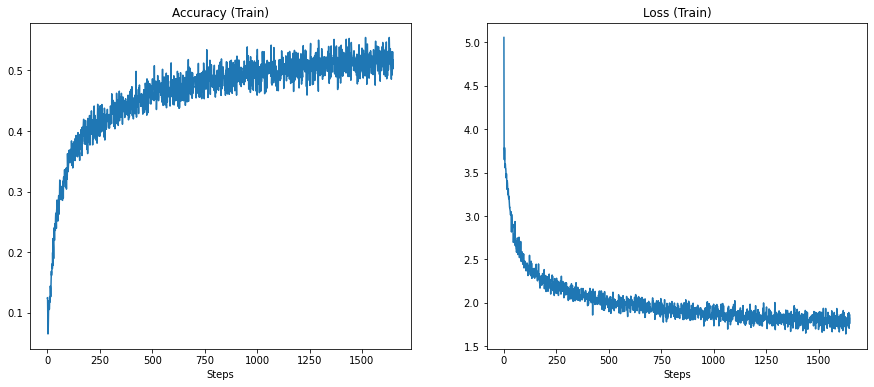

In [ ]:
fig, axes = plt.subplots(figsize=(15, 6), ncols=2)
rnn_model_scores['accuracy'].plot(
    ax=axes[0], title='Accuracy (Train)'
)
rnn_model_scores['loss'].plot(
    ax=axes[1], title='Loss (Train)'
)
for ax in axes:
    ax.set(xlabel='Steps')

In [ ]:
# On importe la fonction native du module permettant de fixer une durée maximale à l'entraînement
from src.time_limit import time_limit

# On définit la durée de l'entraînement
for _ in time_limit(seconds=30): 
  # On affine le modèle
  rnn_model.fit(un_dataset)
  acc, loss = rnn_model.score(un_dataset)
  # On imprime à chaque epoch la précision et la valeur de la loss function
  print('test acc: {}, test loss: {}'.format(
        acc, loss
    ))
  # On demande à chaque epoch d'imprimer une séquence de 100 caractères prédits à partir de la séquence initiale 'Yes, but '
  start_seq = 'Yes, but '
  print(start_seq + rnn_model.generate(
        un_dataset,
        start_seq,
        100
    ))
  print('-----------------------')

In [ ]:
# Pour des raisons de lisibilité, on définit la séquence d'amorce dans une variable à part
start_seq = "Recently, the world "

# On imprime ici directement l'amorce et le texte généré (mais on pourrait enregistrer le texte généré dans une variable par exemple)
print(start_seq + rnn_model.generate(
        un_dataset,
        start_seq,
        5000
    ))

/content/rnn-text-gen/src/text_generator.py:106: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  self._tf_rnn_cell = rnn_cell(
/content/rnn-text-gen/src/text_generator.py:115: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(


Recently, the world oploodd,], [[w:Uniteer Oil explesmesa.ong/article out ob. The heepp?tai has Assidewpe for [[w:Erle as but.    , wer imparlder oshe rewer Iscustaulrornationeday. Welutervary Sollckedem.html.re ta nomme [[w:Unitee Thas of Expramasivend promietsenned powe Thul call salcedent shuma|Marcm UN thay the prils weaders, Oil-hare been, A]], on abouil expals/LOVGERT1104T198&CD.p_L?Nades aid Rais, Stevice]]
[[Cate|datideN ayder mecurde=Sad not, noild we pasqua the ONZPreberual work were<bens:Esient cllo the collesseia]]
[[Category:United Bistreans also Northora|Unine.restment in thaming. Itase officeme|colutpoy''
Edate|simerresal]], [[Iran le Security Colimelion_1 ElBazia]], [[United Nations]]
[[Category:New Yere|date=Octoon spokes expernered Mraperon]] miesed planes [[w:Banua The hoald partulds, eipless/Nibinnati>ng.ppcsus, invesinmes saycesad of syuth ==

*{{saura}} Rus atepuration radam|dacetar ach food Dorld the UN necing.pr/Artice therm [[w:Kofi-Feblire recistont|paino laid

## Exercice

- Quels sont les paramètres qui vous permettent d'améliorer les résultats pour un petit corpus ?
- Quel est l'impact de la taille du corpus ?
- Quelle est la performance du RNN sur la prédiction du wikiCréole ?
- Quel est le type de réseau de neurones qui marche le mieux (sur vos données) ?